In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [37]:
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [67]:
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [24]:
climate_mes=[Measurement.date,Measurement.prcp]
prcp_data = session.query(*climate_mes).\
    order_by(desc(Measurement.date)).all()
prcp_data

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [35]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
last_date

'2017-08-23'

In [40]:
# Calculate the date 1 year ago from the last data point in the database
prcp12_data = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
prcp12_data

datetime.datetime(2016, 8, 23, 0, 0)

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
climate_mes=[Measurement.date,Measurement.prcp]
last12_month = session.query(*climate_mes).\
    filter(Measurement.date>=prcp12_data).\
    order_by(Measurement.date).all()
last12_month

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [43]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_df = pd.DataFrame(last12_month, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)
prcp_df.sort_values(by=['date'])
prcp_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


<function matplotlib.pyplot.show(*args, **kw)>

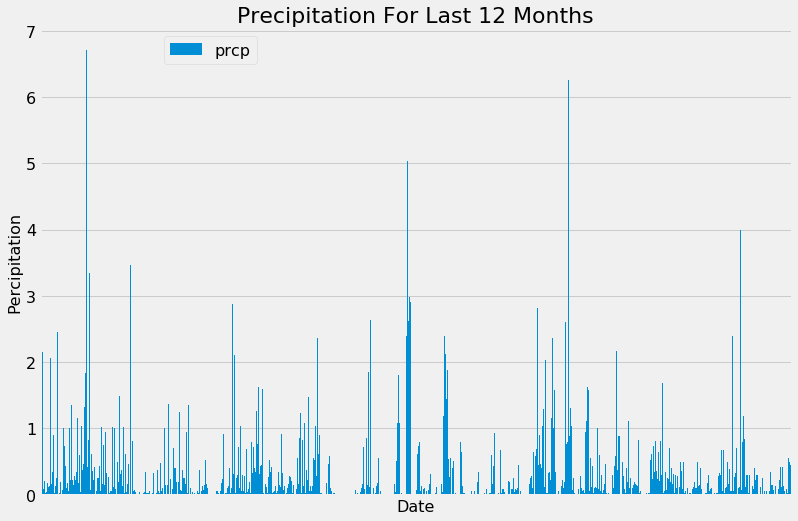

In [96]:
ax= prcp_df.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x', nbins=6)
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
plt.title("Precipitation For Last 12 Months", size=22)
plt.ylabel("Percipitation", size=16)
plt.xlabel("Date", size=16)
plt.xticks([])
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.savefig("Output/Precipitation.png")
plt.show

![precipitation](Images/precipitation.png)

In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [68]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [70]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_data = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
station_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [80]:
active_station = station_data[0][0]
active_station

'USC00519281'

In [81]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == active_station).all()
active_station_temps

[(54.0, 85.0, 71.66378066378067)]

In [83]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hightemp_station = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == active_station).\
    filter(Measurement.date >= prcp12_data).all()
high_temp_df = pd.DataFrame(hightemp_station)
high_temp_df.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0


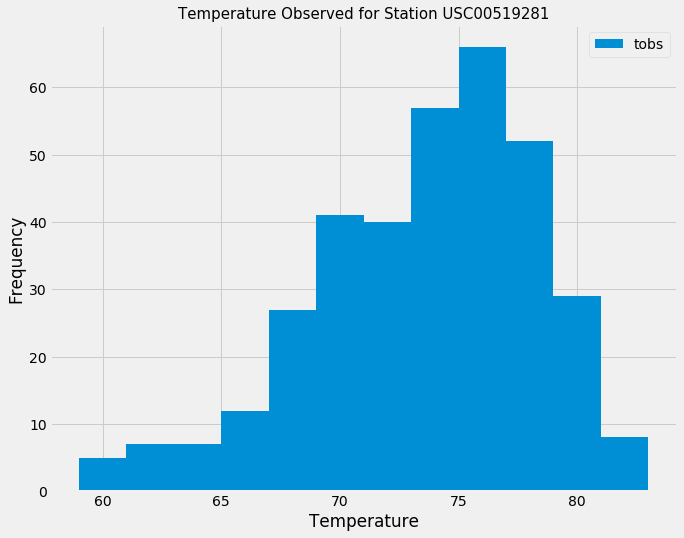

In [85]:
#Plot the results as a histogram with `bins=12`.
high_temp_df.plot.hist(by='station', bins=12, figsize=(10,8))
plt.title("Temperature Observed for Station USC00519281", fontsize=15)
plt.xlabel("Temperature")
plt.savefig("Output/Station_Temps.png")

![precipitation](Images/station-histogram.png)

In [86]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [88]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_data = calc_temps('2017-02-28', '2017-03-05')
trip_data_df = pd.DataFrame(trip_data, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
trip_data_df

,Min Temp,Avg Temp,Max Temp
0,64.0,72.027778,78.0


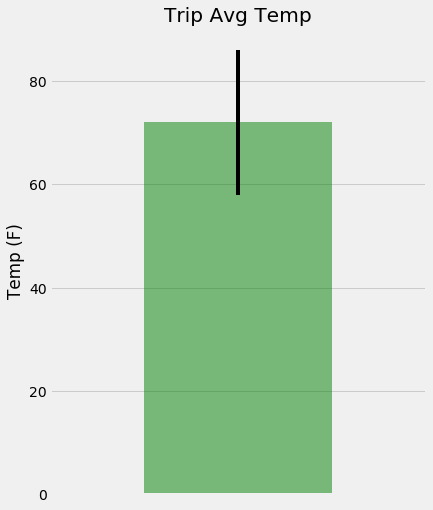

In [95]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
avg_temp = trip_data_df['Avg Temp']
tmax_tmin = trip_data_df['Max Temp'] - trip_data_df['Min Temp']
avg_temp.plot(kind='bar', figsize=(6,8), yerr=tmax_tmin, alpha=0.5, color='green')
plt.title("Trip Avg Temp")
plt.xticks([])
plt.ylabel("Temp (F)")
plt.savefig("Output/temperature.png")

In [116]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
tot_station_rain = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp).\
                    filter(Measurement.date >= "2017-02-28"). filter(Measurement.date <= "2017-03-05").\
                    order_by(Measurement.prcp).all()
df= pd.DataFrame(tot_station_rain)
df.head()

,station,name,latitude,longitude,elevation,prcp
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,NaN
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6,NaN
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0,NaN
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9,NaN
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6,NaN


## Optional Challenge Assignment

In [110]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [123]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []
date_range = ["02-28","02-29","03-01", "03-02", "03-03", "03-05", "03-04", "03-05"]
for date in date_range:
    def daily_normals(date):
        """Daily Normals.
    
        Args:
            date (str): A date string in the format '%m-%d'
        
        Returns:
            A list of tuples containing the daily normals, tmin, tavg, and tmax
    
        """
    
        sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
        return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

    normals.append(daily_normals)
    
daily_normals(date)


# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(60.0, 67.89090909090909, 76.0)]

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
